# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Library untuk manipulasi data
import pandas as pd
import numpy as np

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Mengatur agar Pandas menampilkan semua kolom
pd.set_option('display.max_columns', None)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Tentukan path ke dataset mentah Anda
# Ganti ini jika nama file atau lokasinya berbeda
raw_data_path = "Churn_Modelling.csv"

# Muat dataset ke dalam DataFrame pandas
df_raw = pd.read_csv(raw_data_path)

# Tampilkan 5 baris pertama untuk melihat data
print("--- 5 Baris Pertama Data ---")
display(df_raw.head())

# Tampilkan informasi dasar dataset (tipe data, non-null counts)
print("\n--- Info Dataset ---")
df_raw.info()

--- 5 Baris Pertama Data ---


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

--- Statistik Deskriptif (Kolom Numerik) ---


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000



--- Investigasi Missing Values (Khusus untuk Churn_Modelling.csv) ---
Semua kolom sudah memiliki 10000 non-null values. Tidak ada konversi tipe data yang diperlukan seperti 'TotalCharges'.
Jumlah Missing Values di seluruh dataset: 0
Langkah 2 di kode asli (konversi TotalCharges) ditiadakan.

--- Distribusi Kolom Target (Exited) ---
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

Dataset ini 'imbalanced', dengan mayoritas nasabah (sekitar 80%) tidak churn.


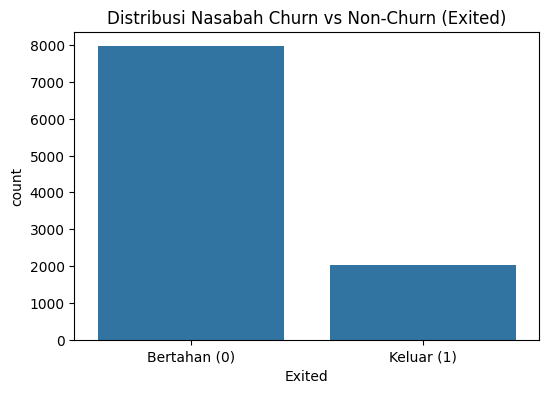

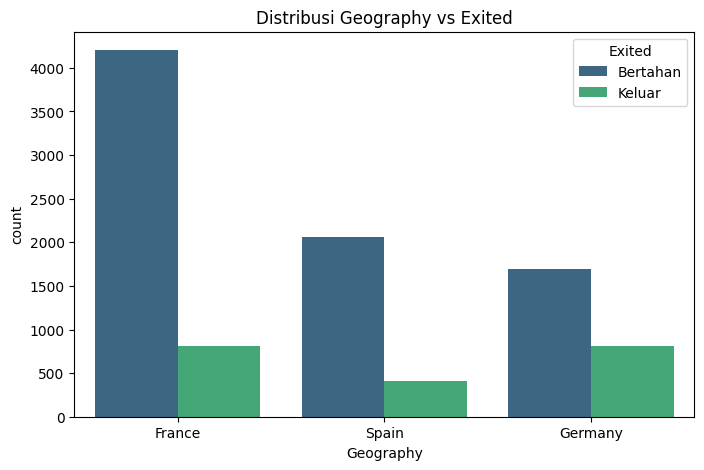

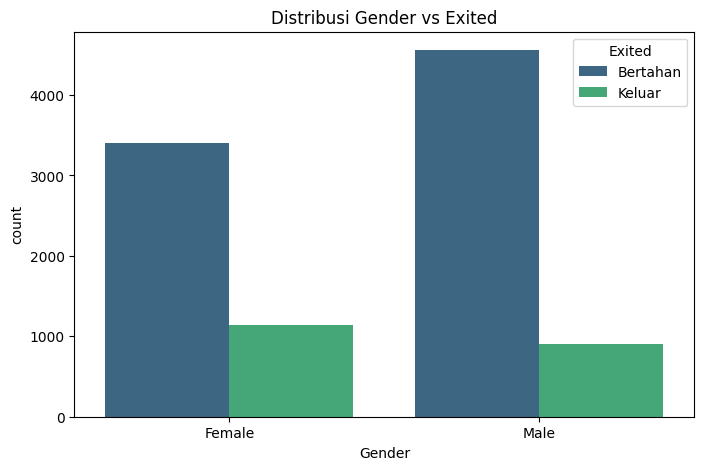

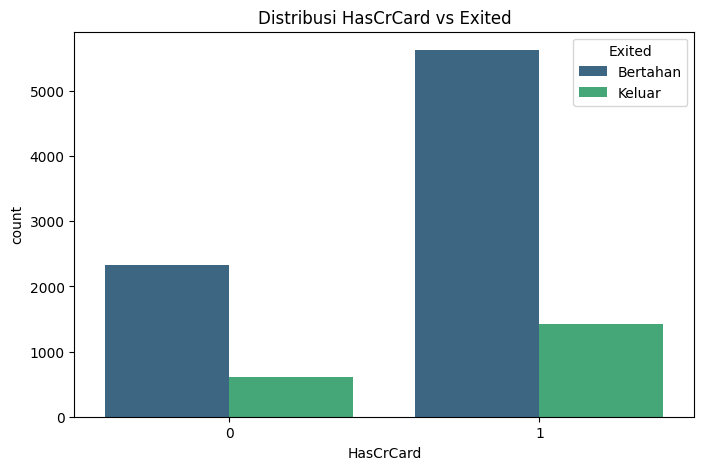

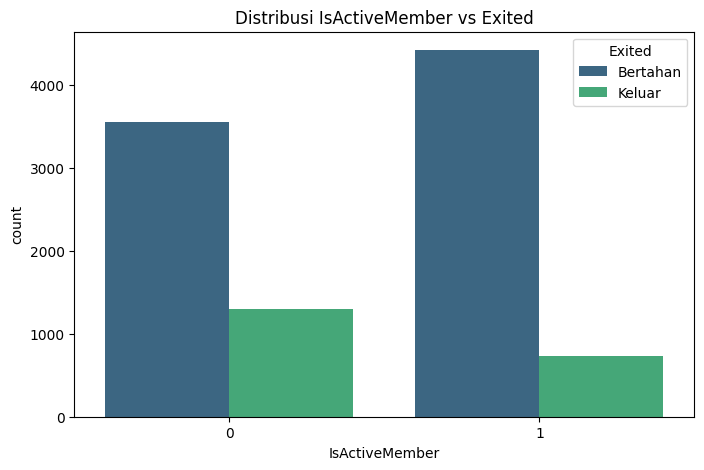

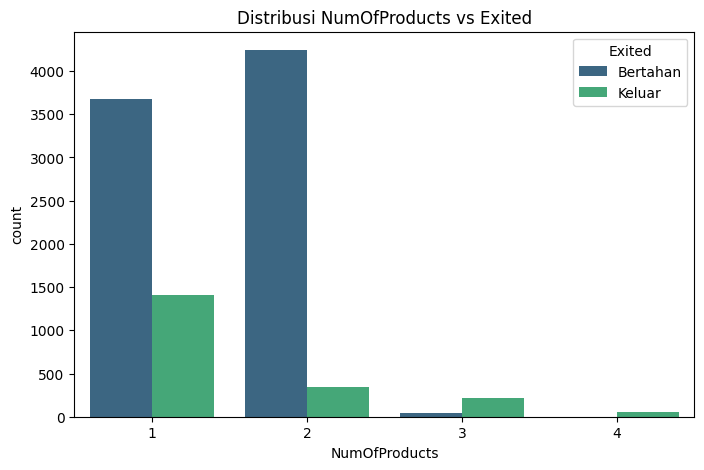

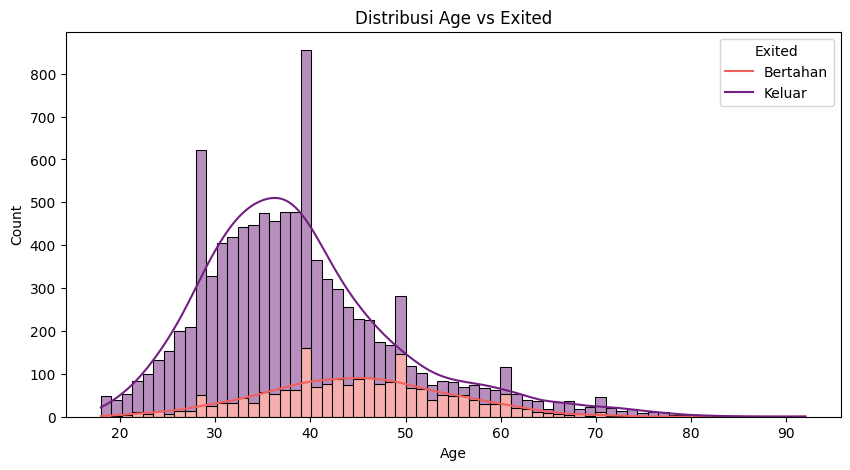

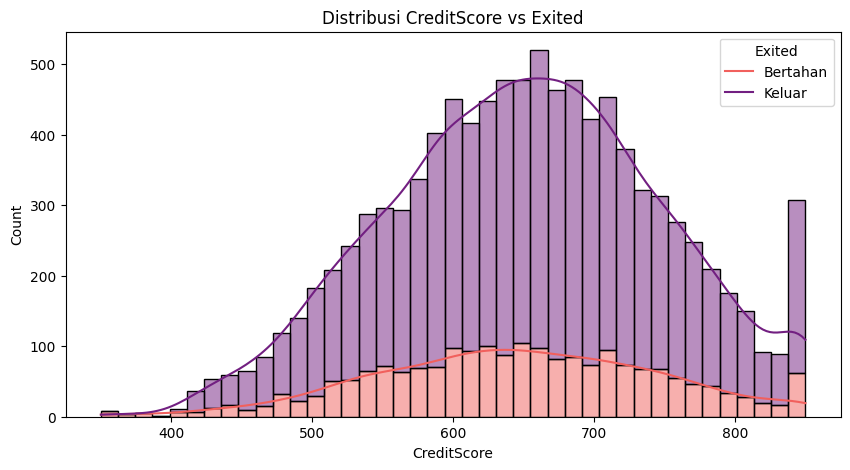

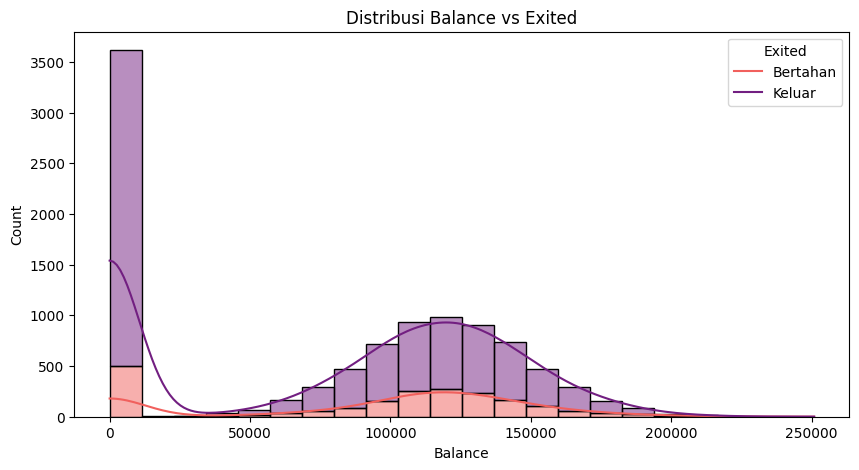

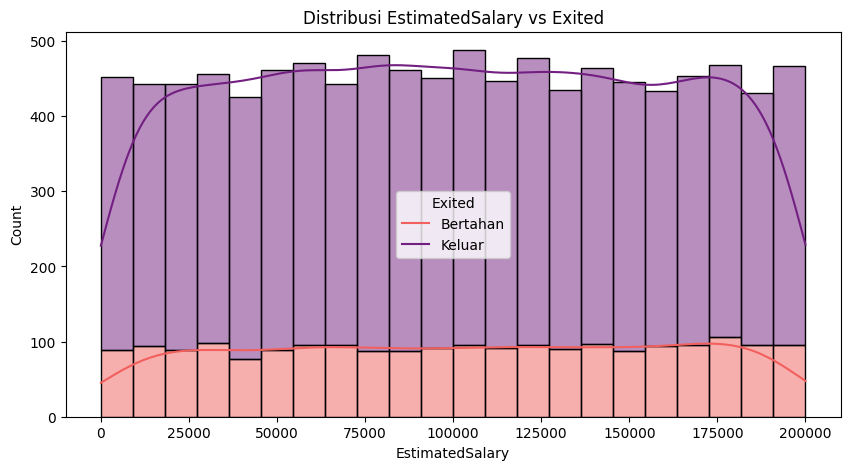

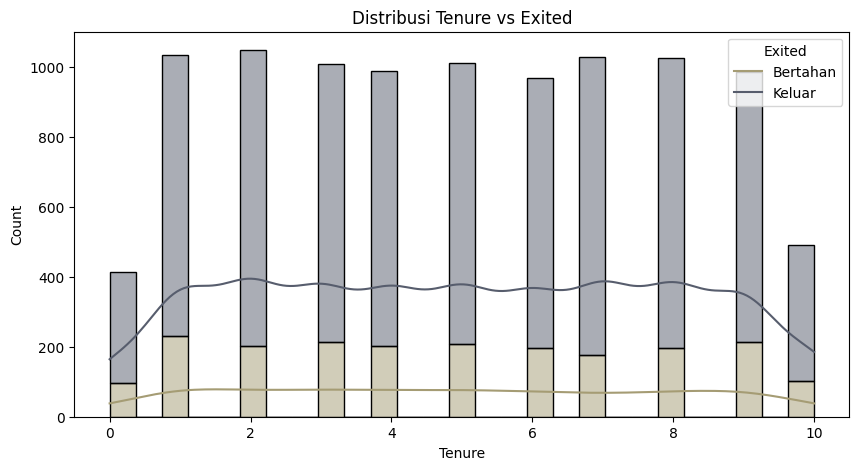

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan df_raw sudah dimuat dari langkah sebelumnya
# df_raw = pd.read_csv("Churn_Modelling.csv") 

# Kita akan bekerja dengan salinan data agar data mentah tetap utuh
df_eda = df_raw.copy()

## 4. Exploratory Data Analysis (EDA) yang Disesuaikan

# 1. Statistik Deskriptif (hanya untuk kolom numerik)
print("--- Statistik Deskriptif (Kolom Numerik) ---")
# Kolom yang tidak relevan seperti RowNumber, CustomerId, dan Exited (Target) dikecualikan
numeric_cols_for_desc = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
display(df_eda[numeric_cols_for_desc].describe())

# 2. Investigasi Missing Values
# Di dataset Churn_Modelling.csv, semua kolom numerik sudah bertipe benar 
# dan info() sebelumnya menunjukkan tidak ada missing value (10000 non-null).
print("\n--- Investigasi Missing Values (Khusus untuk Churn_Modelling.csv) ---")
print("Semua kolom sudah memiliki 10000 non-null values. Tidak ada konversi tipe data yang diperlukan seperti 'TotalCharges'.")
print(f"Jumlah Missing Values di seluruh dataset: {df_eda.isnull().sum().sum()}")
print("Langkah 2 di kode asli (konversi TotalCharges) ditiadakan.")

# 3. Menganalisis Kolom Target ('Exited')
print("\n--- Distribusi Kolom Target (Exited) ---")
# Target kita sekarang adalah 'Exited'
exited_percentage = df_eda['Exited'].value_counts(normalize=True) * 100
print(exited_percentage)

# 0 = Tidak Churn/Bertahan (80%), 1 = Churn/Keluar (20%)
print("\nDataset ini 'imbalanced', dengan mayoritas nasabah (sekitar 80%) tidak churn.")

# Plot visual untuk distribusi Target
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df_eda)
plt.title('Distribusi Nasabah Churn vs Non-Churn (Exited)')
plt.xticks([0, 1], ['Bertahan (0)', 'Keluar (1)'])
plt.show()

# 4. Menganalisis Fitur Kategorikal
# Kita pilih beberapa fitur kategorikal penting untuk dilihat
# Geography dan Gender adalah fitur kategorikal yang penting di dataset ini
categorical_features_to_plot = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts']

for feature in categorical_features_to_plot:
    plt.figure(figsize=(8, 5))
    # Menggunakan 'Exited' sebagai hue
    sns.countplot(data=df_eda, x=feature, hue='Exited', palette='viridis')
    plt.title(f'Distribusi {feature} vs Exited')
    plt.xticks(rotation=0)
    plt.legend(title='Exited', labels=['Bertahan', 'Keluar'])
    plt.show()

# 5. Menganalisis Fitur Numerik
# Kita lihat distribusi 'Age', 'CreditScore', 'Balance', 'EstimatedSalary'
numerical_features_to_plot = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']

for feature in numerical_features_to_plot:
    plt.figure(figsize=(10, 5))
    # Menggunakan kde=True dan hue='Exited'
    sns.histplot(data=df_eda, x=feature, hue='Exited', kde=True, multiple="stack", palette='magma')
    plt.title(f'Distribusi {feature} vs Exited')
    plt.legend(title='Exited', labels=['Bertahan', 'Keluar'])
    plt.show()

# 6. Menganalisis 'Tenure' vs 'Exited' (Tenure dalam bulan/tahun)
plt.figure(figsize=(10, 5))
sns.histplot(data=df_eda, x='Tenure', hue='Exited', kde=True, multiple="stack", palette='cividis')
plt.title('Distribusi Tenure vs Exited')
plt.legend(title='Exited', labels=['Bertahan', 'Keluar'])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Pastikan df_raw sudah dimuat dari langkah sebelumnya
# df_raw = pd.read_csv("Churn_Modelling.csv") 

## 5. Data Preprocessing (Disesuaikan untuk Churn_Modelling.csv)

# Kita mulai dengan salinan baru dari data mentah
df_prep = df_raw.copy()

# --- 1. Pembersihan Data ---
print("--- Pembersihan Data Awal ---")
# a. Menghapus kolom yang tidak relevan untuk pemodelan
# Kolom yang dihapus: RowNumber, CustomerId, Surname
cols_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df_prep = df_prep.drop(cols_to_drop, axis=1)
print(f"Kolom yang dihapus: {cols_to_drop}")

# b. Menangani missing values
# Pada Churn_Modelling.csv, tidak ada missing values di kolom numerik.
# Jadi, kita lewati langkah penanganan 'TotalCharges' yang ada di Telco.
print(f"Jumlah missing values di seluruh dataset: {df_prep.isnull().sum().sum()} (Data bersih)")

# --- 2. Encoding Kolom Target ---
# Kolom target 'Exited' sudah dalam format 0 (Bertahan) dan 1 (Keluar).
# Tidak perlu ada konversi seperti 'Yes'/'No'.

# --- 3. Pemisahan Fitur dan Target ---
X = df_prep.drop('Exited', axis=1) # Target sekarang adalah 'Exited'
y = df_prep['Exited']
print("\nData dipisahkan menjadi Fitur (X) dan Target (y).")

# --- 4. Identifikasi Tipe Kolom ---
# Mengidentifikasi fitur Numerik dan Kategorikal

# Fitur Numerik: Data kontinu
# 'HasCrCard' dan 'IsActiveMember' adalah 0/1 dan akan diperlakukan sebagai numerik (atau binary kategorikal).
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Fitur Kategorikal: Data diskrit atau teks
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Khusus 'HasCrCard' dan 'IsActiveMember', karena sudah 0/1, kita bisa biarkan. 
# Tapi untuk konsistensi, kita masukkan ke kategorikal dan biarkan OneHotEncoder menanganinya, 
# atau lebih efisien, kita keluarkan. Kita keluarkan saja karena sudah 0/1.

# Finalisasi Fitur
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'HasCrCard', 'IsActiveMember']
categorical_features = ['Geography', 'Gender']

print(f"\nFitur Numerik ({len(numerical_features)}): {numerical_features}")
print(f"Fitur Kategorikal ({len(categorical_features)}): {categorical_features}")

# --- 5. Membuat Pipeline Preprocessing ---
# Hanya kolom numerik (kecuali binary) yang perlu Scaling.
# Kita akan scaling semua kolom numerik kecuali HasCrCard dan IsActiveMember.
# Untuk kesederhanaan, kita akan Scaling semua kolom numerik yang terdaftar.

# Buat transformer untuk fitur numerik (Scaling)
numeric_transformer = StandardScaler()

# Buat transformer untuk fitur kategorikal (One-Hot Encoding)
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Gabungkan kedua transformer menggunakan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# --- 6. Menjalankan Preprocessing ---
print("\nMenjalankan preprocessing (scaling dan encoding)...")
X_processed = preprocessor.fit_transform(X)

# --- 7. Membuat DataFrame Hasil Preprocessing ---
# Dapatkan nama fitur baru setelah One-Hot Encoding
encoded_cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Gabungkan nama fitur numerik dan kategorikal yang sudah di-encode
new_feature_names = numerical_features + list(encoded_cat_features)

# Konversi hasil (X_processed) kembali ke DataFrame
df_processed = pd.DataFrame(X_processed, columns=new_feature_names)

# Gabungkan kembali fitur (X) dengan target (y)
df_final = pd.concat([df_processed, y.reset_index(drop=True)], axis=1)

# --- 8. Menyimpan Hasil Preprocessing ---
# Tentukan nama folder dan file untuk output
output_folder = "preprocessing" 
output_filename = f"{output_folder}/bank_churn_preprocessed.csv" # Nama disesuaikan

# Buat foldernya jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Simpan ke CSV
df_final.to_csv(output_filename, index=False)
print(f"\nPreprocessing selesai.")
print(f"Data yang sudah diproses disimpan di: {output_filename}")

# Tampilkan 5 baris pertama dari data yang sudah diproses
print("\n--- Contoh Data Setelah Diproses ---")
display(df_final.head())

print("\n--- Info Data Setelah Diproses ---")
df_final.info()

Jumlah baris setelah dibersihkan: 7032
Jumlah missing values setelah dibersihkan: 0

Fitur Numerik (3): ['tenure', 'MonthlyCharges', 'TotalCharges']
Fitur Kategorikal (16): ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Menjalankan preprocessing (scaling dan encoding)...

Preprocessing selesai.
Data yang sudah diproses disimpan di: preprocessing/telco_churn_preprocessed.csv

--- Contoh Data Setelah Diproses ---


,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-1.280248,-1.161694,-0.994194,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,0.064303,-0.260878,-0.173740,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,-1.239504,-0.363923,-0.959649,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,0.512486,-0.747850,-0.195248,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
4,-1.239504,0.196178,-0.940457,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1



--- Info Data Setelah Diproses ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   float64
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   gender_Female                            7032 non-null   float64
 4   gender_Male                              7032 non-null   float64
 5   SeniorCitizen_0                          7032 non-null   float64
 6   SeniorCitizen_1                          7032 non-null   float64
 7   Partner_No                               7032 non-null   float64
 8   Partner_Yes                              7032 non-null   float64
 9   Dependents_No                            7032 non-null   float64
 10  Dependents_Y